# Week 12 — Logistic Regression

- Binary classification intuition
- The sigmoid function
- Log-odds and interpretation
- One-Hot Encoding
- ROC curves, accuracy vs F1
- **Practical**: Predict allergy outcome based on features
---
# Logistic Regression
>
>Logistic Regression is a statistical method for predicting outcomes.
>
>In this practical session we are going to study Logistic Regression particularly applied for binary problems where we want to predict (`0/1`, `True/False`, `Yes/No`) based on one or more predictor variables (features).
>
>This method is widely used in various fields such as medicine, finance, and social sciences, for classification tasks.
>
>In essence, Logistic Regression models the *probability* of belonging to the positive class or not.
>
___
>## The Sigmoid Function
>
>The core of **Logistic Regression** is the **sigmoid function** (also known as the logistic function). It takes any real-valued number and maps it to a value between 0 and 1.
>
>**The sigmoid is defined as:**
>
>$$
>\sigma(z) = \frac{1}{1 + e^{-z}}
>$$
>
>**Where**:
>- **$z$** is the **input to the function** (which can be any real number).
>- **$e$** is the **base of the natural logarithm** (approximately equal to 2.71828).
>
___
>## Log-Odds Interpretation
>
>In probability, `odds` is defined as the **ratio of** the **probability of the occurrence of an event** to the **probability of its non-occurrence**:
>
>**odds is defined as:**
>
>$$
>\text{odds} = \frac{p}{1-p}
>$$
>
>**Where**:
>- **$p$** is the **probability of the event occurring**.
>- **$1-p$** is the **probability of the event not occurring**.
>- **odds** represents **how many times more likely** the event is **to occur** than **not occur**.
>
>In **Logistic Regression**, we model the `log-odds (logit)` of the **probability of the positive class** as a **linear combination of the input features**.
>
>**Log-odds is defined as:**
>
>$$
>\log\left(\frac{p}{1-p}\right)= w_0 + w_1 x_1 + ... + w_n x_n
>$$
>
>**Where**:
>- **$p$** is the **probability of the positive class**.
>- **$w_0$** is the **intercept**.
>- **$w_1, ..., w_n$** are the **coefficients for each feature**.
>
>This means that **for a one-unit increase in feature** **$x_i$**, the **log-odds of the positive class changes by** **$w_i$**, **holding all other features constant**.
___
## SETUP

**Install the required libraries if you haven't already:**

In [99]:
# uncomment if you need any of those
#!pip install numpy pandas scipy seaborn statsmodels

**Import necessary libraries:**

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, roc_curve, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Load Dataset

In [101]:
df = pd.read_csv('food_allergy_dataset.csv')

## Exploratory Data Analysis

Let's first analyze the numerical and categorical features

In [102]:
df.head()

,Age,Gender,Family_History,Previous_Reaction,Symptoms,Food_Type,Food_Frequency,Medical_Conditions,IgE_Levels,Severity_Score,Allergic
0,56,Other,No,Moderate,Swelling,Gluten,15,Asthma,581.122868,8,React
1,19,Male,No,NaN,Swelling,Eggs,12,NaN,79.476767,9,React
2,76,Male,Yes,Severe,No symptoms,Nuts,0,Asthma,724.859374,2,React
3,65,Other,No,Severe,Nausea,Nuts,10,NaN,654.815285,6,React
4,25,Other,No,NaN,Skin rash,Eggs,27,Asthma,493.307102,9,React


### Q1. Verify the `Symptoms`, `Previous_Reaction`, `Food_Type` and `Allergic` features for their unique values and distribution

In [103]:
df.Symptoms.value_counts()

Symptoms
Breathing issues    2069
Swelling            2006
No symptoms         1981
Skin rash           1975
Nausea              1969
Name: count, dtype: int64

df.Seasoning

In [104]:
df.Previous_Reaction.value_counts()

Previous_Reaction
Severe      2509
Moderate    2472
Mild        2411
Name: count, dtype: int64

In [105]:
# your code here
df.Food_Type.value_counts()

Food_Type
Nuts       2049
Seafood    2011
Gluten     1995
Eggs       1983
Dairy      1962
Name: count, dtype: int64

In [106]:
df.Allergic.value_counts()

Allergic
React        9116
Not React     884
Name: count, dtype: int64

### Q2. Among the categorical features, identify the one that we will set as the target variable for our logistic regression model.

In [107]:
# Allergic

>**The features we analyzed are categrical and have a lot of unique values**
>
>**Logistic Regression requires numerical input, so we need to convert these categorical features into a numerical format.**
>
>**We can achieve this by converting categorical variables into numerical directly like:**
>```python
>categoricak_column_map{'category_1':0, 'category_2':1, ...}
>df['categorical_column'] = df['categorical_column'].replace(categoricak_column_map, inplace=True)
>```
>
>**Right?**
>
>**We could do that, but this approach has a significant drawback:**
>
>- it introduces an **unintended ordinal relationship** between categories.
>
>    - For example, if we encode 'Red' as 0, 'Blue' as 1, and 'Green' as 2, the model might interpret 'Green' as being greater than 'Blue' and 'Red', which is not meaningful in this context.
>
>To avoid this issue, we use **One-Hot Encoding (OHE)**.
___
>### One-Hot Encoding (`OHE`)
>
>- Logistic Regression requires numerical features.
>
>- Categorical columns must be converted into dummy variables:
>
>- **Reasons for OHE:**
>    - Numeric category codes introduce fake ordering
>
>    - Transforms categories into numeric indicators that does not convey order
>
>    - Avoids **multicollinearity** by removing one base category `.get_dummies(drop_first=True)`
>
>    - Logistic Regression learns linear relationships, but categories do not follow a linear numerical progression.
>
>- **Disadvantages**
>
>    - High Dimensionality (the “Curse of Dimensionality”)
>        - Makes training slower
>
>        - Increases memory and storage requirements
>
>**Notes for this dataset:**
>
>- Categorical Features will produce hundreds of dummy variables
>- Disadvantage of `OHE` is that increases the memory and processing requirements
___
>### Multicollinearity
>- When features are highly correlated, it can lead to instability in the model's coefficients.
>- In `OHE`, if we include all dummy variables for a categorical feature, it can lead to perfect multicollinearity (the "dummy variable trap").
>- To avoid this, we typically drop one of the dummy variables using the `drop_first=True` parameter in `pd.get_dummies()`.
>
>**Example:**
>```python
>df_encoded = pd.get_dummies(df, columns=['categorical_column'], drop_first=True)
>```
>This will create dummy variables for all categories except the first one, which serves as the reference category.
>
>For example, if we have a categorical feature "Color" with categories "Red", "Blue", and "Green", using `drop_first=True` will create dummy variables for "Blue" and "Green", while "Red" will be the reference category like the table below:
>| Color | Color_Blue | Color_Green  |Color_Red (to drop)|
>|-------|------------|--------------|-------------------|
>| Red   | 0          | 0            |1                  |
>| Blue  | 1          | 0            |0                  |
>| Green | 0          | 1            |0                  |
>
>**Notice that we can understand the color `Color_Red` when both `Color_Blue` and `Color_Green` are `0`.**
>This way, we avoid multicollinearity while still capturing the information about the categorical feature.
___
### Q3. Use `pd.get_dummies(drop_first=True)` to perform One-Hot Encoding on the categorical features that may be relevant. Do not include the `target variable`.
- Besides the `target variable`, should we also exclude any other categorical features that may not be relevant for prediction or could introduce bias into the model?

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Gender              10000 non-null  object 
 2   Family_History      10000 non-null  object 
 3   Previous_Reaction   7392 non-null   object 
 4   Symptoms            10000 non-null  object 
 5   Food_Type           10000 non-null  object 
 6   Food_Frequency      10000 non-null  int64  
 7   Medical_Conditions  6696 non-null   object 
 8   IgE_Levels          10000 non-null  float64
 9   Severity_Score      10000 non-null  int64  
 10  Allergic            10000 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 859.5+ KB


In [109]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['Gender',
 'Family_History',
 'Previous_Reaction',
 'Symptoms',
 'Food_Type',
 'Medical_Conditions',
 'Allergic']

In [110]:
df_encoded = pd.get_dummies(df[categorical_features], columns=categorical_features[:], drop_first=True, dtype=int)
df_encoded.head()

,Gender_Male,Gender_Other,Family_History_Yes,Previous_Reaction_Moderate,Previous_Reaction_Severe,Symptoms_Nausea,Symptoms_No symptoms,Symptoms_Skin rash,Symptoms_Swelling,Food_Type_Eggs,Food_Type_Gluten,Food_Type_Nuts,Food_Type_Seafood,Medical_Conditions_Eczema,Allergic_React
0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1
3,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1


### Q4. Verify if the original categorical columns after encoding to avoid redundancy in the dataset.
- Test for `Gender` for example

In [111]:
'Gender' in df_encoded.columns # get_dummies takes care of that for us

False

### Q5. Inspect the number of columns in the encoded dataframe.

In [112]:
df_encoded.shape # it increased by a lot right?

(10000, 15)

### Q6. Create a `df_final` DataFrame that includes all the encoded features and the variables that will be used in the model.
- Use `pd.concat()` to combine the encoded features and the target variable into a single DataFrame.

>**Example:**
>```python
>df_final = pd.concat([df_1, df_2], axis=1)
>```

In [113]:
# obtaining the list of numerical to add
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features

['Age', 'Food_Frequency', 'IgE_Levels', 'Severity_Score']

In [114]:
df_final = pd.concat([df_encoded, df[numerical_features]], axis=1)
df_final.head(2)

,Gender_Male,Gender_Other,Family_History_Yes,Previous_Reaction_Moderate,Previous_Reaction_Severe,Symptoms_Nausea,Symptoms_No symptoms,Symptoms_Skin rash,Symptoms_Swelling,Food_Type_Eggs,Food_Type_Gluten,Food_Type_Nuts,Food_Type_Seafood,Medical_Conditions_Eczema,Allergic_React,Age,Food_Frequency,IgE_Levels,Severity_Score
0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,56,15,581.122868,8
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,19,12,79.476767,9


### Q7. Separate features and target variables into `X` and `y`.

- Remove any variable that will not be used in the model too

>**Example:**
>```python
>   X = df_encoded.drop(columns=[list_of_features_to_remove_including_target], axis=1)
>   y = df_encoded['target_variable']
>```

In [115]:
X = df_encoded.drop(columns=['Allergic_React'], axis=1)
y = df_encoded['Allergic_React']

In [116]:
y.value_counts()

Allergic_React
1    9116
0     884
Name: count, dtype: int64

In [117]:
X.head(2)

,Gender_Male,Gender_Other,Family_History_Yes,Previous_Reaction_Moderate,Previous_Reaction_Severe,Symptoms_Nausea,Symptoms_No symptoms,Symptoms_Skin rash,Symptoms_Swelling,Food_Type_Eggs,Food_Type_Gluten,Food_Type_Nuts,Food_Type_Seafood,Medical_Conditions_Eczema
0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0


### Before evaluating a Logistic Regression model, we must test it on data that the model **has never seen before**.
---
>### Train–Test Split
>
>We divide the dataset into:
> - **Training set** → model learns  
> - **Test set** → model is evaluated fairly  
>
>- Typical splits are:
>   - **80% training / 20% testing** , 
>   - **70% training / 30% testing**
>
>**Example:**
>```python
>from sklearn.model_selection import train_test_split
>
>X_train, X_test, y_train, y_test = train_test_split(
>    X_encoded, y, test_size=0.20, random_state=42, stratify=y
>)
>```
>
>- `stratify=y` preserves class balance  
>- `random_state=42` guarantees reproducibility  

---

### Q8. Split the dataset into training and testing sets using an 70-30 split while mantaining the class balance.
- Set the `random_state` to `42` for reproducibility.

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30,
    random_state=42, stratify=y
)


>## Training a Logistic Regression Model
>
>After preparing the dataset (OHE, train–test split, feature scaling if needed),  
>we can train a **Logistic Regression** model using scikit-learn.
>By default, Logistic Regression uses **max_iter = 100**, which may be too low:
>
>- With many dummy variables  
>- With correlated features  
>- With large datasets  
>
>The solver might fail to converge and produce warnings.  
>We increase to ensure stable optimization.

---

>**Example: Training the Model**
>```python
>from sklearn.linear_model import LogisticRegression
>
>model = LogisticRegression(max_iter=5000)
>model.fit(X_train, y_train)
>```
___
>**Once fitted, we can use the model to make predictions on new data.**
>
>```python
>y_pred = model.predict(X_test)
>y_prob = model.predict_proba(X_test)[:, 1]
>```
___
### Q9. Train a Logistic Regression model using the training set and make the predictions to evaluate.

In [119]:
# TRAINING
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# PREDICTIONS
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
y_prob

array([0.89380611, 0.90470211, 0.88739052, ..., 0.91570625, 0.92324654,
       0.894325  ])



>### Accuracy
>
>Measures *overall correctness* of the model:
>
>$$
>\text{Accuracy} = \frac{\text{Correct predictions}}{\text{Total predictions}}
>$$
>
>**Example:**
>```python
>from sklearn.metrics import accuracy_score
>
>accuracy = accuracy_score(y_test, y_pred)
>print("Accuracy:", accuracy)
>```

---

>### F1-Score
>
>Accuracy can lie when classes are unbalanced.  
>The **F1-score** combines Precision and Recall into a single metric.
>
>Useful when:
> - One class is rare  
> - False negatives matter (e.g., detecting allergies)  
>
>**Example:**
>```python
>from sklearn.metrics import f1_score
>
>f1 = f1_score(y_test, y_pred)
>print("F1 Score:", f1)
>```

---

>### ROC Curve
>
>Logistic Regression outputs **probabilities**, not only class predictions.
>
>The ROC Curve shows the tradeoff between:
> - **True Positive Rate**
> - **False Positive Rate**
>
>**AUC (Area Under Curve)** summarizes performance:
> - **0.5 = random guess**
> - **1.0 = perfect model**
>
>**Example:**
>```python
>from sklearn.metrics import roc_curve, roc_auc_score
>import matplotlib.pyplot as plt
>
>y_prob = model.predict_proba(X_test)[:, 1]
>fpr, tpr, _ = roc_curve(y_test, y_prob)
>auc = roc_auc_score(y_test, y_prob)
>
>plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
>plt.plot([0, 1], [0, 1], "k--")
>plt.xlabel("False Positive Rate")
>plt.ylabel("True Positive Rate")
>plt.title("ROC Curve - Logistic Regression")
>plt.legend()
>plt.show()
>```

---

>### Confusion Matrix
>
>Shows *how* the model is making mistakes:
>
> - **TP** (True Positive)  
> - **TN** (True Negative)  
> - **FP** (False Positive)  
> - **FN** (False Negative)  
>
>**Example:**
>```python
>from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
>
>cm = confusion_matrix(y_test, y_pred)
>disp = ConfusionMatrixDisplay(confusion_matrix=cm)
>disp.plot(cmap="Blues")
>plt.title("Confusion Matrix")
>plt.show()
>```

---

>### Summary
>These evaluation tools help us understand:
> - global performance (**Accuracy**)  
> - balance between false positives/negatives (**F1**)  
> - quality of probability estimates (**AUC**)  
> - detailed prediction errors (**Confusion Matrix**)  
___
### Q10. Evaluate the Logistic Regression model using Accuracy, F1-Score, ROC Curve (AUC), and Confusion Matrix.
- Use `print(classification_report(y_test, y_pred))` to get a summary for each class


In [120]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       265
           1       0.91      1.00      0.95      2735

    accuracy                           0.91      3000
   macro avg       0.46      0.50      0.48      3000
weighted avg       0.83      0.91      0.87      3000



d:\SETUPS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\SETUPS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\SETUPS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


>**The warningsare pretty relevant and occurred because the Recall on the Negative class is 0**
### Q11. Plot ROC Curve and Confusion Matrix for the model.


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       265
           1       0.91      1.00      0.95      2735

    accuracy                           0.91      3000
   macro avg       0.46      0.50      0.48      3000
weighted avg       0.83      0.91      0.87      3000



d:\SETUPS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\SETUPS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\SETUPS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


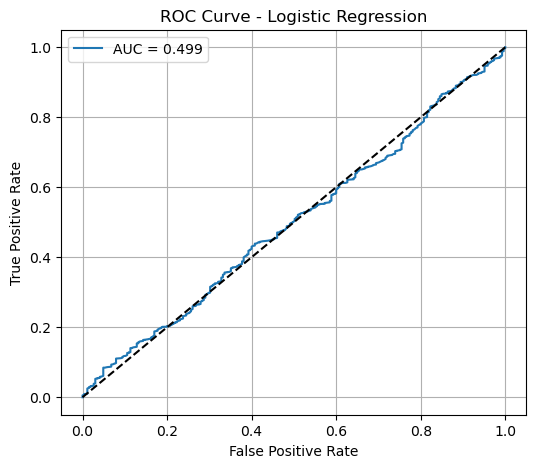

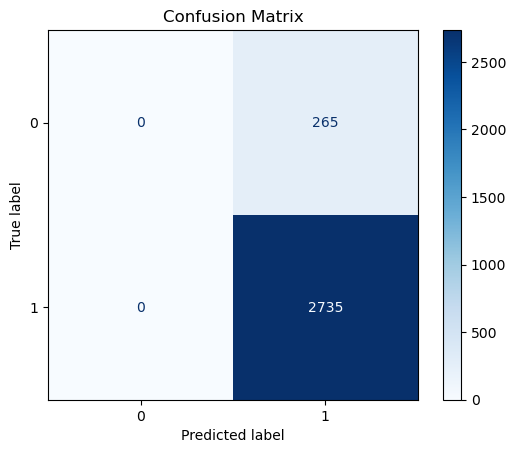

In [121]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ------------------------------------------------------
# ROC CURVE
# ------------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------
# CONFUSION MATRIX
# ------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

>### We have breakdown the procedure into many questions but if you notice, the overall steps are pretty easy and are summarized below:
>
>   - We are also mantaining less classes, notice that the Recall on the Negative Class is better now
>   - Selecting relevant features are crucial for Logistic Regression performance.
>   - Selecting all the features will not guaranteee good results.

Accuracy: 0.9685
F1 Score: 0.9827539009033671

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       177
           1       0.98      0.98      0.98      1823

    accuracy                           0.97      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.97      0.97      0.97      2000



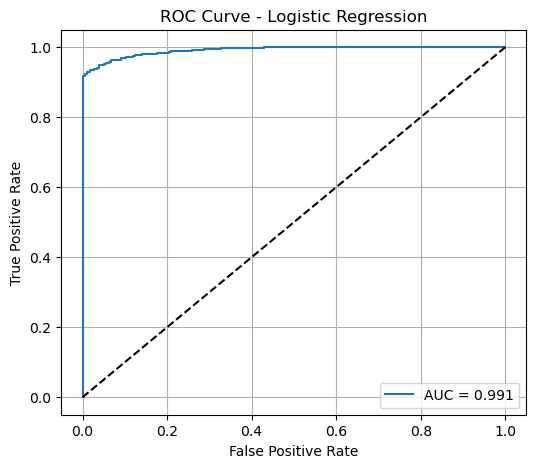

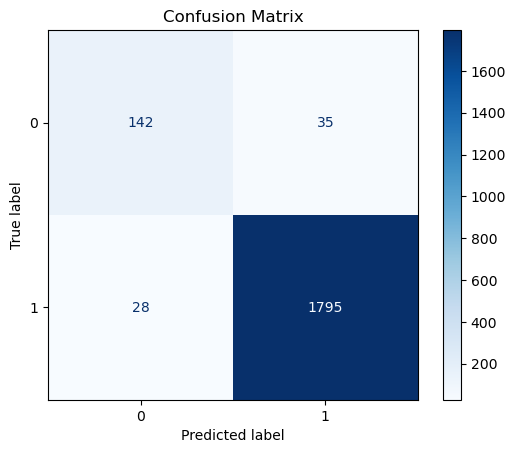

In [122]:
# ------------------------------------------------------
# 1. LOAD AND PREPARE DATA
# ------------------------------------------------------
df = pd.read_csv("food_allergy_dataset.csv")

# Casting Target variable to int
y = df["Allergic"].map({'React': 1, 'Not React': 0})

# Features selected
feature_cols = [
    "Age", "Gender", "Family_History", "Previous_Reaction",
    "Symptoms", "Food_Type", "Food_Frequency",
    "Medical_Conditions", "IgE_Levels", "Severity_Score"
]

X = df[feature_cols]

# ------------------------------------------------------
# 2. ONE-HOT ENCODING
# ------------------------------------------------------
X_encoded = pd.get_dummies(X, drop_first=True, dtype=int)

# ------------------------------------------------------
# 3. TRAIN-TEST SPLIT
# ------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.20,
    random_state=42, stratify=y
)

# ------------------------------------------------------
# 4. TRAIN LOGISTIC REGRESSION
# ------------------------------------------------------
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# ------------------------------------------------------
# 5. PREDICTIONS & METRICS
# ------------------------------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ------------------------------------------------------
# 6. ROC CURVE
# ------------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------
# 7. CONFUSION MATRIX
# ------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


### Dataset is imbalanced
>
>- **Class**
>
>   - 0 (no allergy)	177
>
>   - 1 (allergy)	1823
>
>**That’s roughly: 90% allergic vs 10% not allergic**
>
>This imbalance makes the model’s job easier: lots of positive examples
>
>- **This explains:**
>
>   - Very high F1
>
>   - Very high accuracy
>
>   - Very strong separation in ROC

## Tips: How to Choose Good Variables for Logistic Regression?
>
>### 1. The variable must help predict the target
>- 
>   **Feature should be logically or causally related to the outcome.**
>
>   - Ask: "Is there a plausible relationship between this feature and the target?"
>- 
>   **Check association with the target using:**
>
>   - Distribution plots
>
>   - Boxplots
>
>   - Chi-square tests (categorical)
>- 
>   **If model performance improves when the feature is included → it's useful.**
>
>### 2. Avoid highly redundant variables (multicollinearity)